In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from string import punctuation
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Всеволод\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Импорт данных

In [34]:
data = pd.read_csv('jumoresci_data.csv')
data.index = data.id_post
data.text = data.text.fillna("")
data = data.drop(columns = ['id_group', 'description', 'title', 'id_post'])
data = data.dropna()
data.head(3)

data                                               text  \
id_post                                                                  
480545   1713384533  ТЕЛЕГА: острополитическое\n \nhttps://t.me/myf...   
480648   1713543900  - Павел\n- Павел\n- Доводилось ли вам бывать н...   
480645   1713536700   У гея оптимиста сракотан всегда наполовину полон   

           views  likes  reposts  
id_post                           
480545   13940.0    117        2  
480648    5282.0     63       86  
480645   23857.0    236      234

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45217 entries, 480545 to 20117
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     45217 non-null  int64  
 1   text     45217 non-null  object 
 2   views    45217 non-null  float64
 3   likes    45217 non-null  int64  
 4   reposts  45217 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


### Fun fact

In [39]:
print (f'Число символов в датасете: {len (" ".join(data.text.values))}')

Число символов в датасете: 16381651


## Some statistical representations

### Numerical Data Histplots

В данных заметны аномалии если их просто брать и отображать

<Axes: xlabel='views', ylabel='Count'>

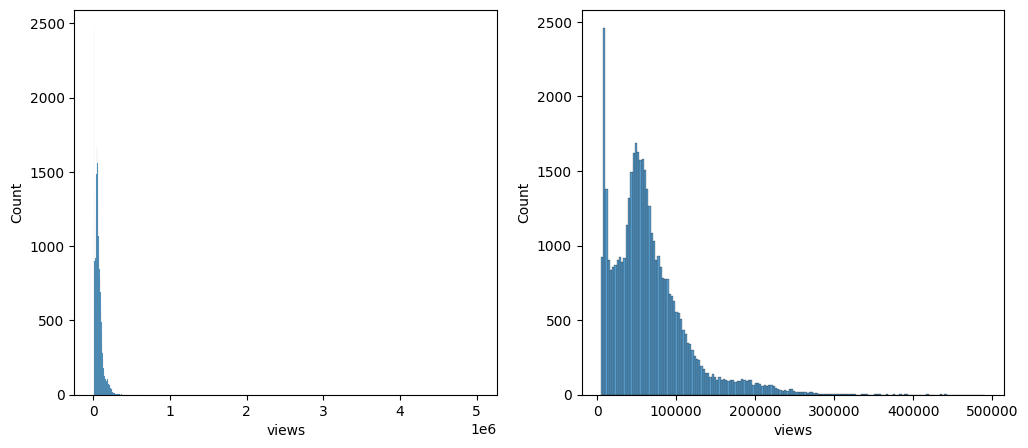

In [66]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
sns.histplot(data.views, ax = ax [0])
sns.histplot(data.views.loc[data.views < 500000])

<Axes: xlabel='likes', ylabel='Count'>

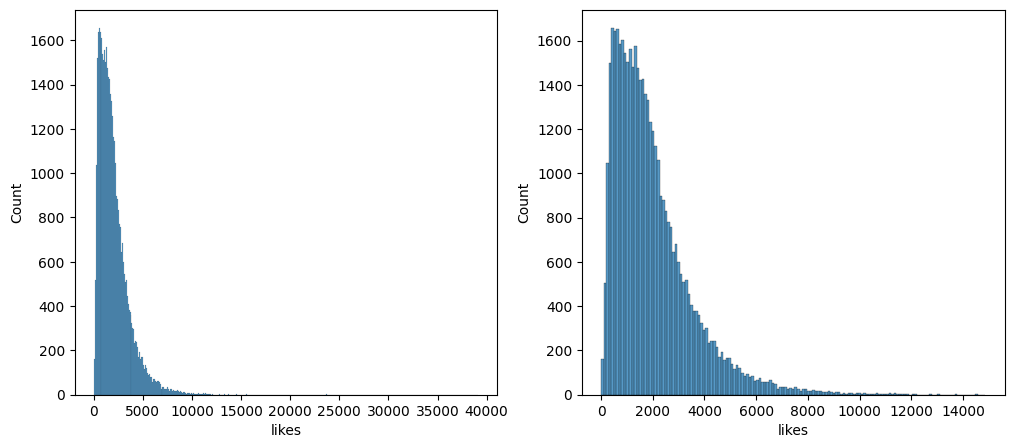

In [68]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
sns.histplot(data.likes, ax = ax [0])
sns.histplot(data.likes.loc[data.likes < 15000])

<Axes: xlabel='reposts', ylabel='Count'>

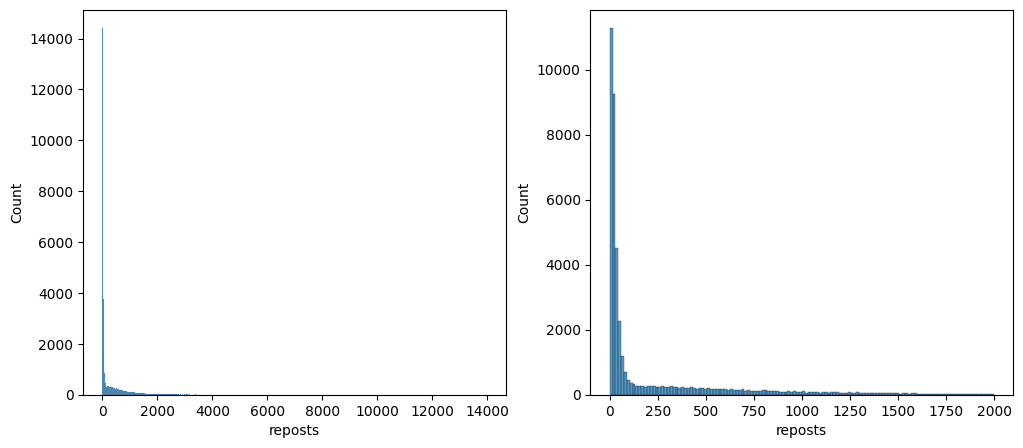

In [71]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
sns.histplot(data.reposts, ax = ax [0])
sns.histplot(data.reposts.loc[data.reposts < 2000])

### Correlations 

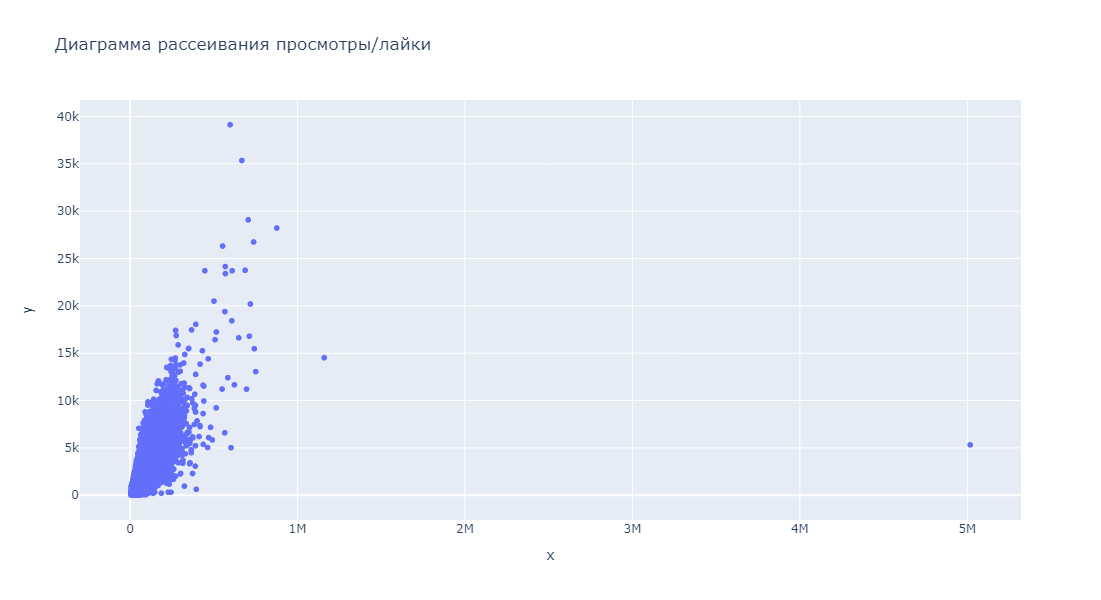

In [85]:
fig = px.scatter(x=data.views, y=data.likes, title='Диаграмма рассеивания просмотры/лайки')
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)
fig.show()

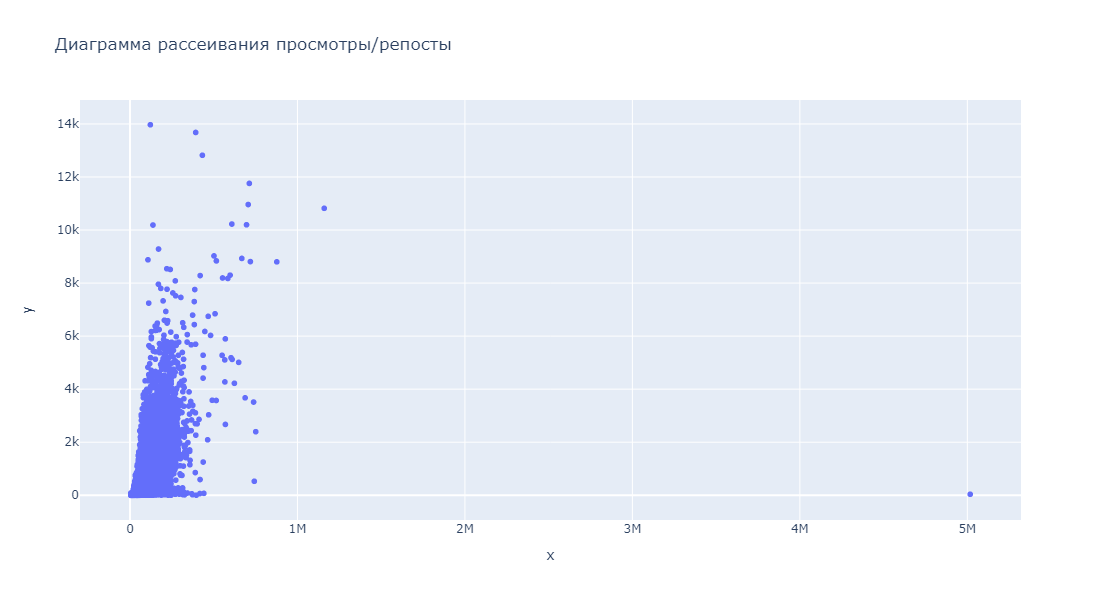

In [87]:
fig = px.scatter(x=data.views, y=data.reposts, title='Диаграмма рассеивания просмотры/репосты')
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)
fig.show()

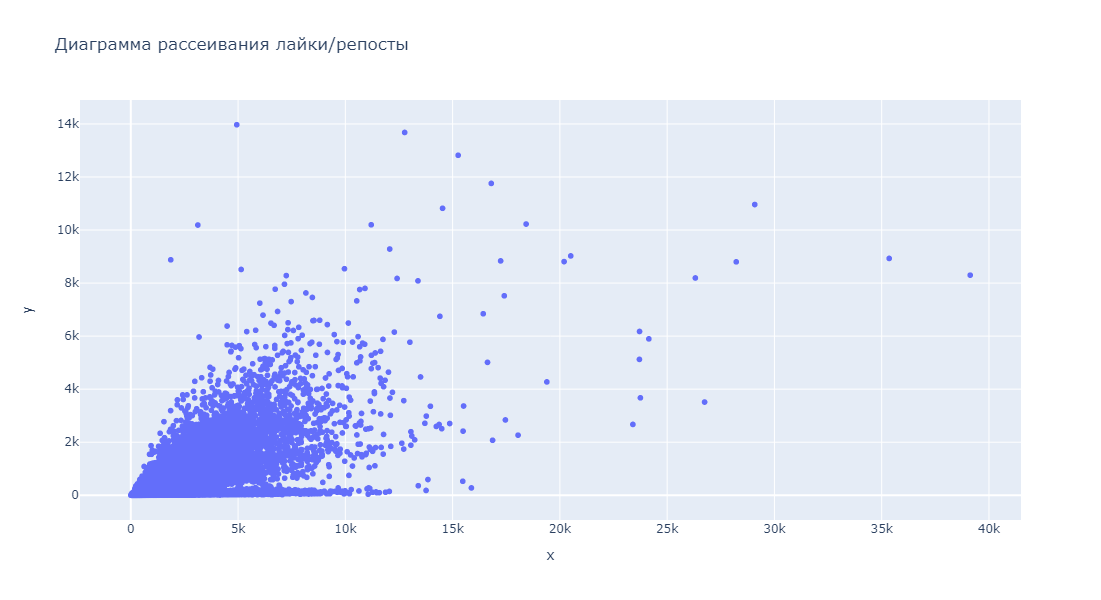

In [88]:
fig = px.scatter(x=data.likes, y=data.reposts, title='Диаграмма рассеивания лайки/репосты')
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)
fig.show()

## Text visualization

### Preparing our text

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Всеволод\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [108]:
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [113]:
text = " ".join(data.text.values[:20])

In [114]:
text = preprocess_text (text)

### Word cloud

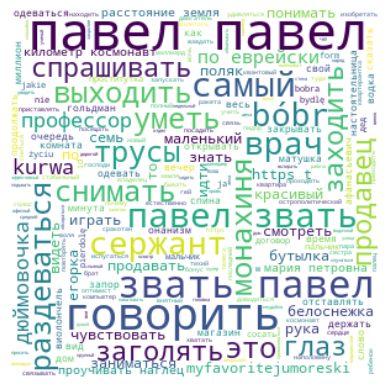

In [116]:
wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");